In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv')

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.shape

(30641, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Data Transformations

## Drop the Unnamed Column

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [11]:
unique_values = df['WklyStudyHours'].unique()

# Print the unique values
print(unique_values)

['< 5' '5 - 10' '> 10' nan]


### Change weekly study hours column

### To detect any outlier

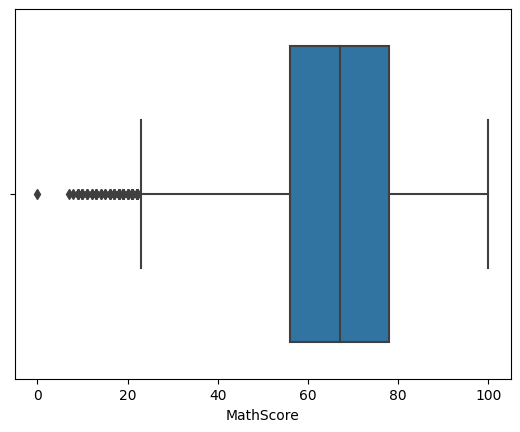

In [12]:
sns.boxplot(data=df, x='MathScore')

plt.show()

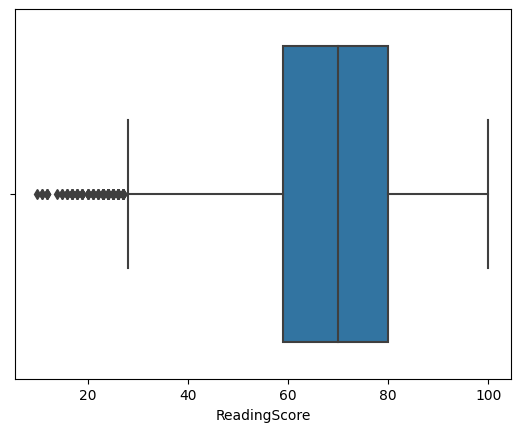

In [13]:
sns.boxplot(data=df, x='ReadingScore')
plt.show()

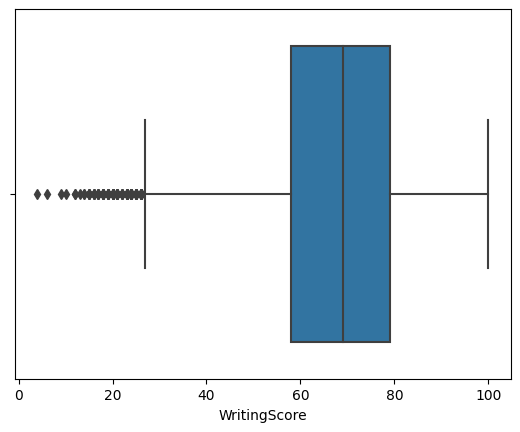

In [14]:
sns.boxplot(data=df, x='WritingScore')
plt.show()

***From the above box plots, we can say that the maximum outlier is seen in the Maths Score, suggesting that high difficulty level of the subject, which needs more effective measures to help the students.***

## 1) Gender analysis

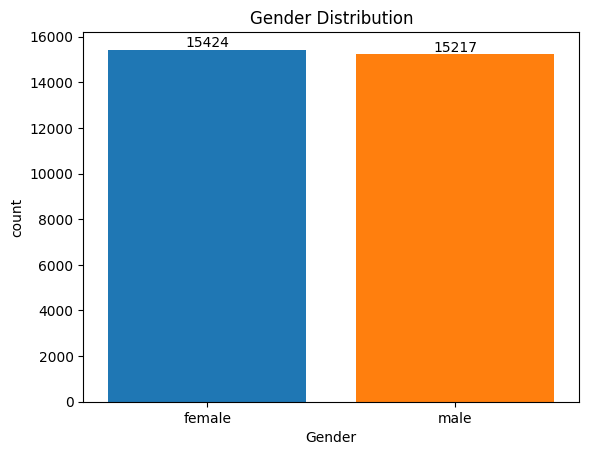

In [15]:
ax=sns.countplot(data=df, x='Gender', saturation=1.0)

#sns.set(rc={'figure.figsize':(5,5)})

ax.bar_label(ax.containers[0])           # to show the count of respective gender.

plt.title("Gender Distribution")
sns.set_style("white")
ax.grid(False)

plt.show()

***From the above analysis we found that the no. of females is 15424 and that of males is 15217, which is slightly less than the females.***

## 2) Impact of Parent's Educational level on students'performance

In [16]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [17]:
parent_edu = df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parent_edu)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


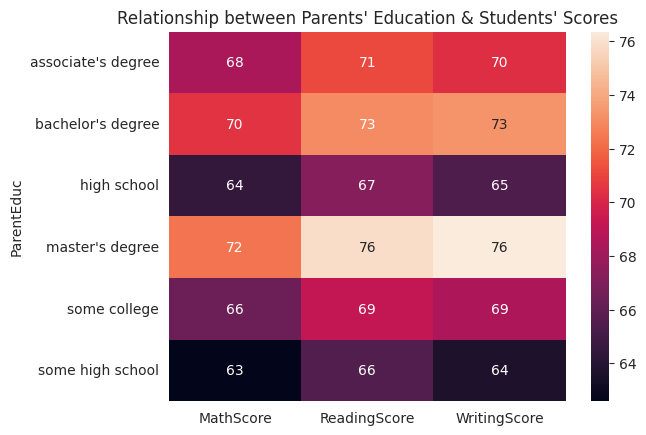

In [18]:
sns.heatmap(parent_edu, annot = True)

plt.title("Relationship between Parents' Education & Students' Scores")
plt.show()

***From the above analysis we can conclude that the educational level of the parents has a significant role to play in their kids' test scores.***

## 3) Impact of parents' marital status on the students' test performance

In [19]:
marital_status = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parent_edu)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


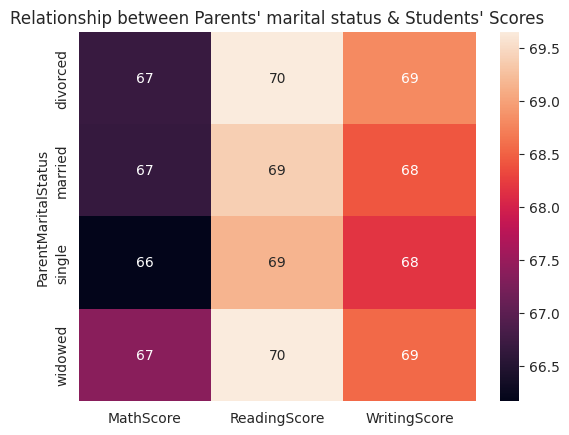

<Figure size 400x400 with 0 Axes>

In [20]:
sns.heatmap(marital_status, annot = True)
plt.title("Relationship between Parents' marital status & Students' Scores")
plt.figure(figsize=(4,4))
plt.show()

***From the above chart we can say that the marital status of parents have negligible impact on the test scores of the students.***

## 4) Analysing the impact of ethinicity on the students' scores.

In [21]:
category_counts = df['EthnicGroup'].value_counts(dropna=False)
print(category_counts)

EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
NaN        1840
Name: count, dtype: int64


In [22]:
percent_nan = (1840/30640)*100
rounded_value = round(percent_nan,0)
print(rounded_value)

6.0


**Since, the count and % of nan values in the ethinic group is low, so we will ignore those values from our ethnic group analysis.**

### Ethnic group distribution

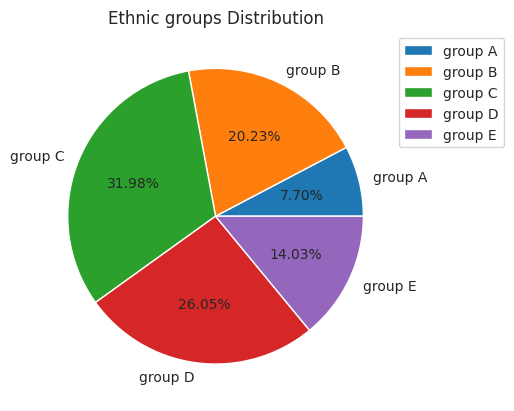

In [23]:
#count the values of ethnic groups in respective categories and then passing it through a list.
groupA = df.loc[(df['EthnicGroup']== 'group A')].count()
groupB = df.loc[(df['EthnicGroup']== 'group B')].count()
groupC = df.loc[(df['EthnicGroup']== 'group C')].count()
groupD = df.loc[(df['EthnicGroup']== 'group D')].count()
groupE = df.loc[(df['EthnicGroup']== 'group E')].count()

l = ['group A','group B', 'group C', 'group D', 'group E']
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist,labels=l, autopct="%1.2f%%")             # %1.2f%% 1 means padding space between digits which is usually not necessary, .2 signifies the no. of digits after decimal, f means floating point number.

plt.title('Ethnic groups Distribution')
plt.legend(l, loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

In [24]:
ethinicity = df.groupby('EthnicGroup').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(ethinicity)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


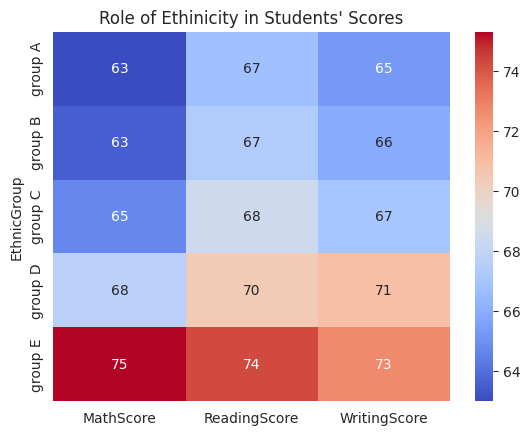

<Figure size 400x400 with 0 Axes>

In [25]:
sns.heatmap(ethinicity, annot = True, cmap='coolwarm')
plt.title("Role of Ethinicity in Students' Scores")
plt.figure(figsize=(4,4))
plt.show()

***From the above 2 graphs we can see that the Group C has the maximum no. of students (31.98%) but the students from Group E (14.03%) have performed much better in the test.***

## 5) Role of Sports Practice in Students' Test performance

In [26]:
unique_values = df['PracticeSport'].unique()

# Print the unique values
print(unique_values)

['regularly' 'sometimes' 'never' nan]


In [27]:
sports = df.groupby('PracticeSport').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(sports)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


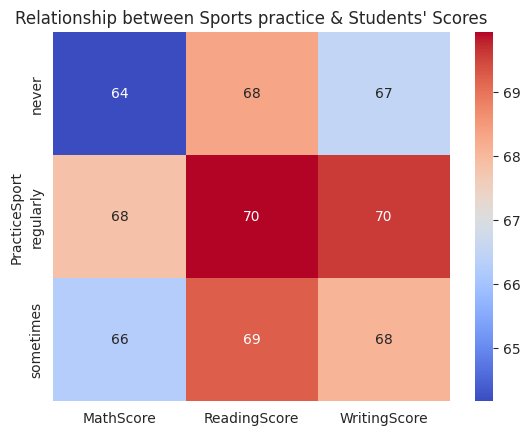

<Figure size 400x400 with 0 Axes>

In [28]:
sns.heatmap(sports, annot = True, cmap='coolwarm')
plt.title("Relationship between Sports practice & Students' Scores")
plt.figure(figsize=(4,4))
plt.show()

***From the above analysis we can see that the students who practice sports regularly or practice sometimes have performed better in analytical subjects (Maths and Writing) as compared to those who do not practice sports at all.***

## 6) Impact of Test Prep in Students' Test Performance

In [29]:
unique_values =df['TestPrep'].unique()
print(unique_values)

['none' nan 'completed']


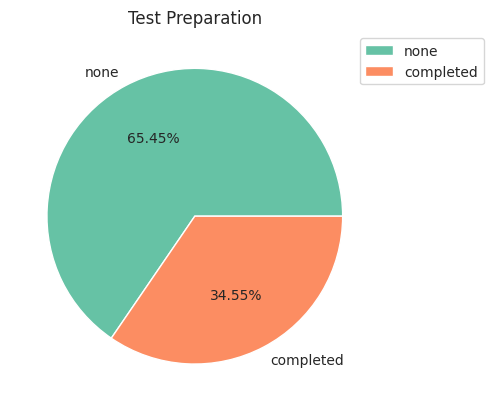

In [30]:
none = df.loc[(df['TestPrep']== 'none')].count()
completed = df.loc[(df['TestPrep']== 'completed')].count()

l=['none', 'completed']

mlist = [none['TestPrep'],completed['TestPrep']]

custom_palette = sns.color_palette("Set2")
custom_colors = custom_palette[:len(mlist)] 
plt.pie(mlist,labels=l, autopct="%1.2f%%", colors=custom_colors)   # %1.2f%% 1 means padding space between digits which is usually not necessary, .2 signifies the no. of digits after decimal, f means floating point number.


plt.title('Test Preparation')
plt.legend(l, loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

In [31]:
test = df.groupby('TestPrep').agg({'MathScore':'mean','ReadingScore':'mean', 'WritingScore':'mean'})
print(test)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


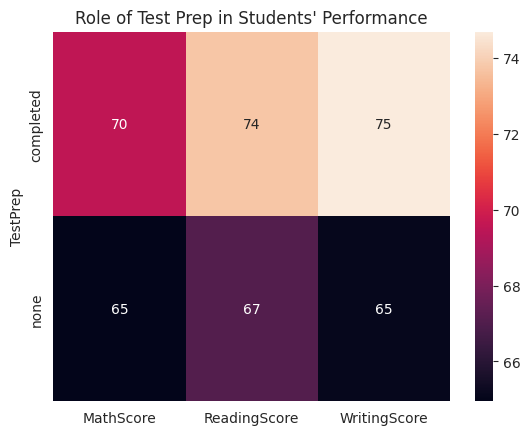

In [32]:
sns.heatmap(test, annot = True)
#plt.figure(figsize=(4,5))
plt.title("Role of Test Prep in Students' Performance")
plt.show()

***From the above analysis we see that 65.45% students have not taken the test prep whereas 34.55% students took test prep. Surprisingly, the students who have taken the test prep have performed much better than the ones who did not take. This suggests that the strategy of Test Preparation has significant role in helping the students to score good marks.***

## 7) Role of Weekly Study Hours in Students' Performance

In [33]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [34]:
unique_values = df['WklyStudyHours'].unique()
print(unique_values)

['< 5' '5 - 10' '> 10' nan]


In [35]:
values=df['WklyStudyHours'].value_counts()
print(values)

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64


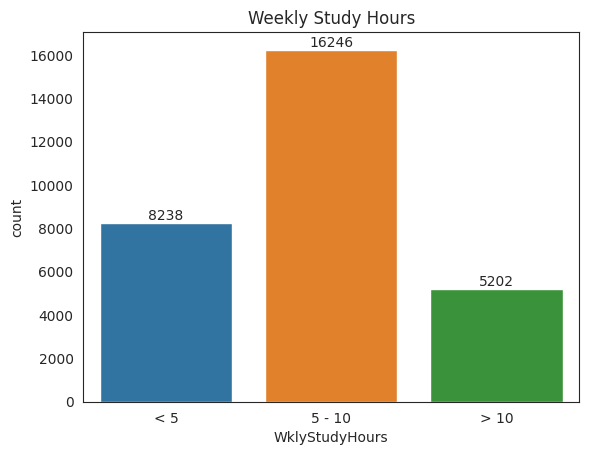

In [36]:
ax = sns.countplot(x = 'WklyStudyHours', data = df)
#plt.figure(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.title('Weekly Study Hours')
plt.show()

In [37]:
hours = df.groupby('WklyStudyHours').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(hours)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


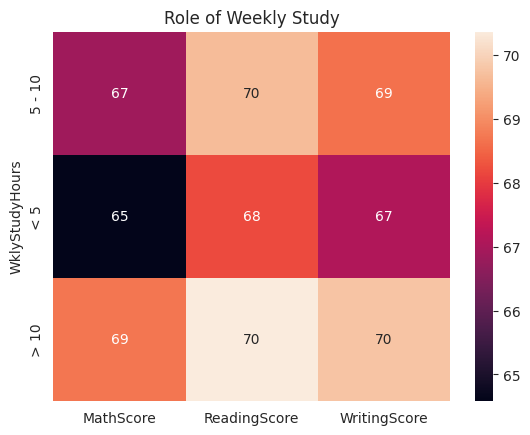

In [38]:
sns.heatmap(hours, annot = True)
#plt.figure(figsize=(4,5))
plt.title('Role of Weekly Study')
plt.show()